In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Movie data.csv to Movie data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Movie data.csv')
df.head()


,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1


In [ ]:
df.isnull().sum()

,0
Review,0
Rating,0
Sentiment,0


In [ ]:
df[['Review', 'Rating', 'Sentiment']].head()

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize
sid = SentimentIntensityAnalyzer()

# Apply to your data
df['VADER_Score'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
from sklearn.metrics import accuracy_score

# Compare VADER sentiment with original labels
accuracy = accuracy_score(df['Sentiment'], df['VADER_Sentiment'])
print(f"VADER Sentiment Accuracy: {accuracy:.2f}")


VADER Sentiment Accuracy: 0.70


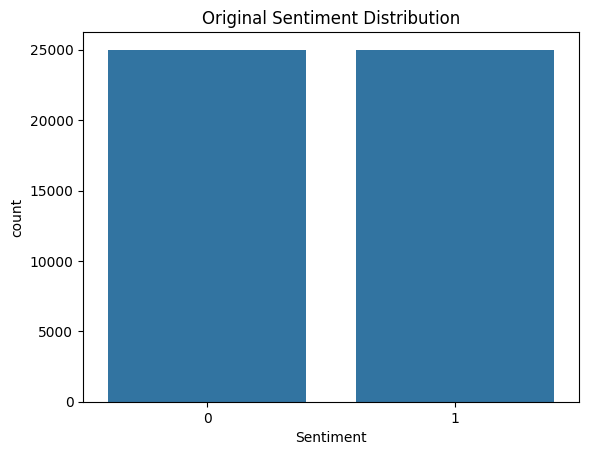

In [ ]:
# Sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title("Original Sentiment Distribution")
plt.show()



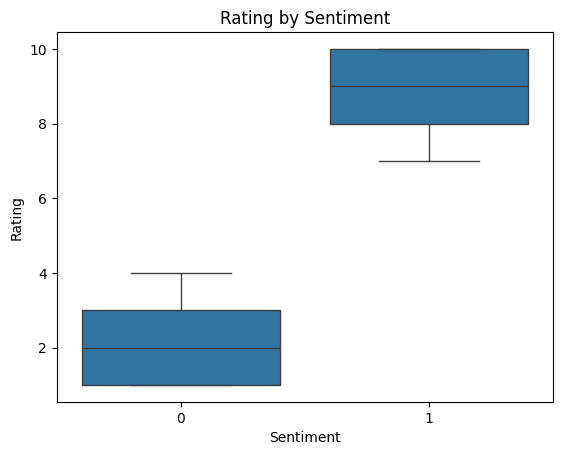

In [ ]:
# Rating vs Sentiment
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title("Rating by Sentiment")
plt.show()


In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Review']).toarray()

# Target
y = df['Sentiment']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4945
           1       0.89      0.90      0.89      5055

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Define 'Success' based on rating
df['Success'] = df['Rating'].apply(lambda x: 1 if x >= 7 else 0)

# Features: VADER sentiment, rating, review length
X_success = df[['Rating', 'VADER_Sentiment']]
y_success = df['Success']

# Split and model
X_train, X_test, y_train, y_test = train_test_split(X_success, y_success, test_size=0.2, random_state=42)

model_success = LogisticRegression()
model_success.fit(X_train, y_train)

# Predict
y_pred_success = model_success.predict(X_test)
print("Success Prediction Accuracy:", accuracy_score(y_test, y_pred_success))


Success Prediction Accuracy: 1.0
